In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge

In [4]:
df = pd.read_csv(r"C:\Users\Sourabh\Desktop\Laptop_Price.csv")

In [5]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [6]:
df.shape

(1273, 13)

In [7]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [8]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [9]:
df.tail()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [10]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [11]:
df.info

<bound method DataFrame.info of      Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              C

In [12]:
df = df.dropna()

In [13]:
df.dropna(axis=1, inplace=True)

<Axes: xlabel='Os', ylabel='Count'>

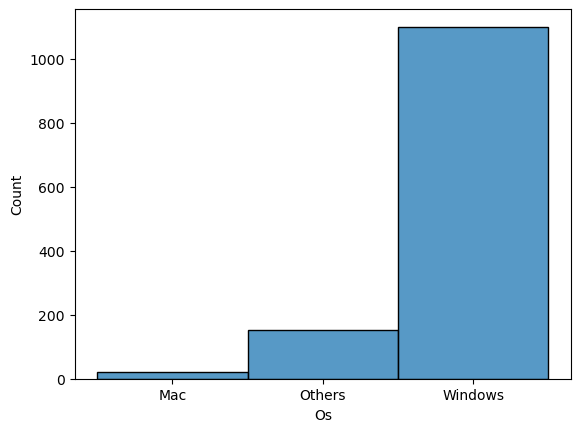

In [14]:
sns.histplot(df.Os)

<Axes: xlabel='Weight', ylabel='Company'>

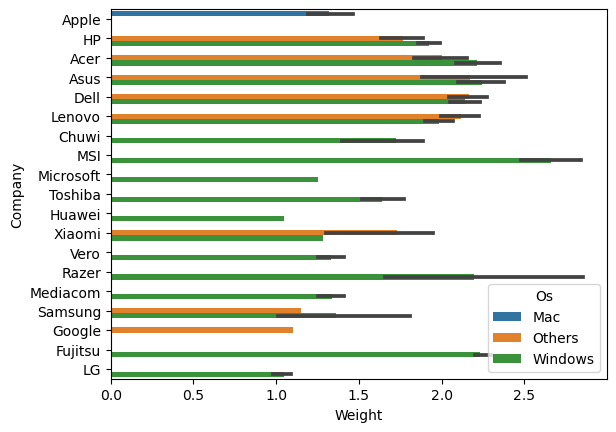

In [15]:
sns.barplot(x='Weight', y='Company', data=df, hue='Os')

In [16]:
c = df.groupby('Gpu_brand')['Gpu_brand'].count()

<Axes: xlabel='Gpu_brand'>

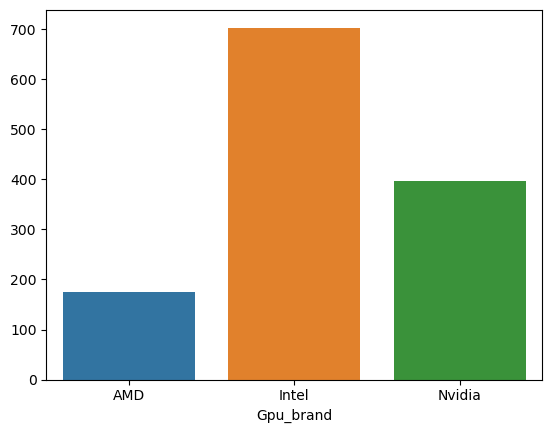

In [17]:
sns.barplot(x=c.index, y=c.values)

<Axes: xlabel='Ram', ylabel='Company'>

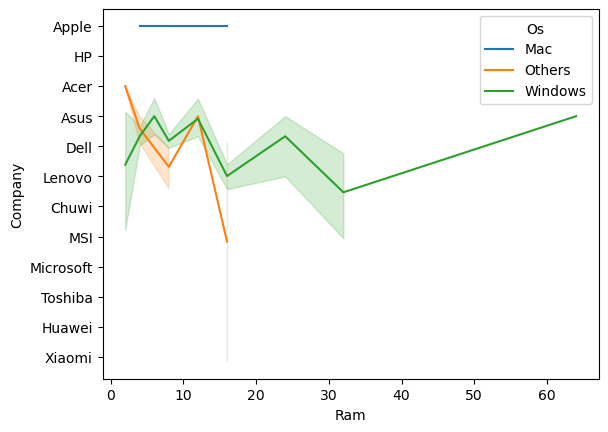

In [18]:
sns.lineplot(x='Ram', y='Company', data=df, hue='Os')

Text(0.5, 1.0, 'Swarmplot for price of the laptops')

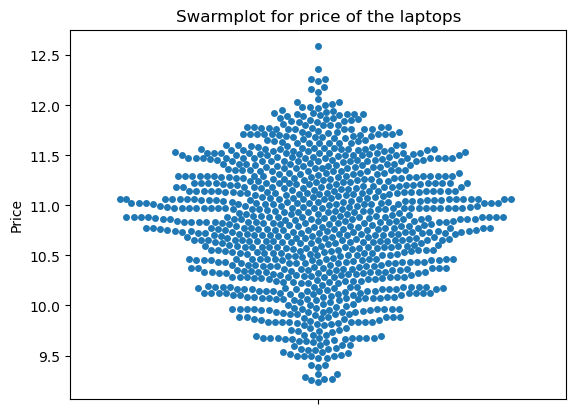

In [19]:
sns.swarmplot(df.sample(1000).Price)
plt.title('Swarmplot for price of the laptops')

C:\Users\Sourabh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarmplot of types of laptops')

C:\Users\Sourabh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


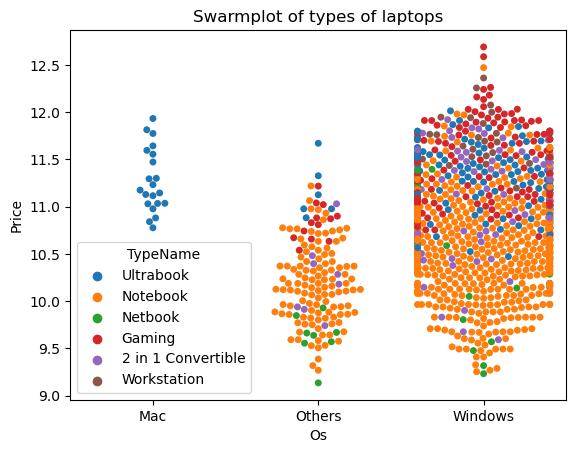

In [71]:
sns.swarmplot(x='Os', y='Price', data=df, hue='TypeName')
plt.title('Swarmplot of types of laptops')

<Axes: xlabel='Price'>

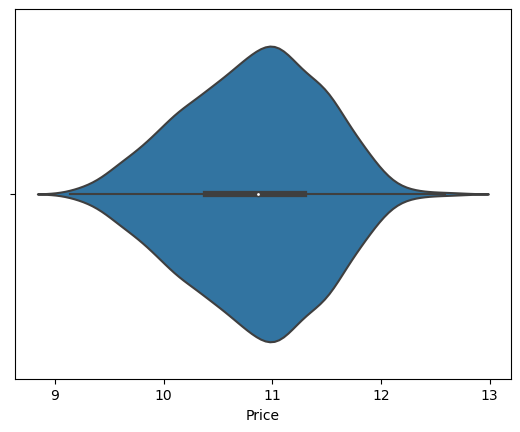

In [20]:
sns.violinplot(x='Price', data=df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

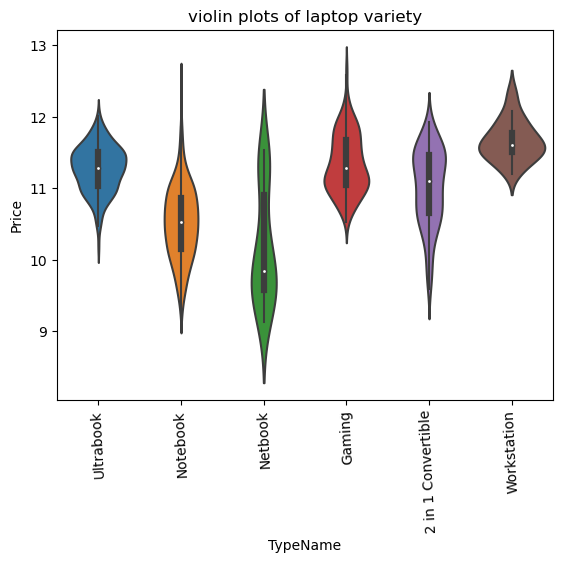

In [21]:
sns.violinplot(x='TypeName', y='Price', data=df)
plt.title('violin plots of laptop variety')
plt.xticks(rotation=453)

Text(0.5, 1.0, 'Scatterplot of laptop prices on weights')

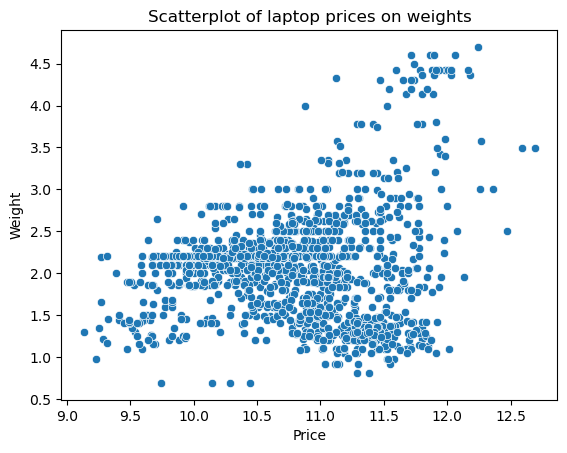

In [69]:
sns.scatterplot(x='Price', y='Weight', data=df)
plt.title('Scatterplot of laptop prices on weights')

In [72]:
p = df.groupby('Company')['Company'].count()

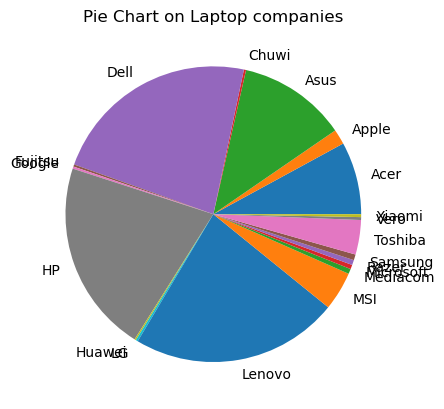

In [76]:
plt.pie(p, labels = p.index)
plt.title('Pie Chart on Laptop companies')
plt.show()

Text(0.5, 1.0, 'Lineplot for Prices of laptop depend on Ram')

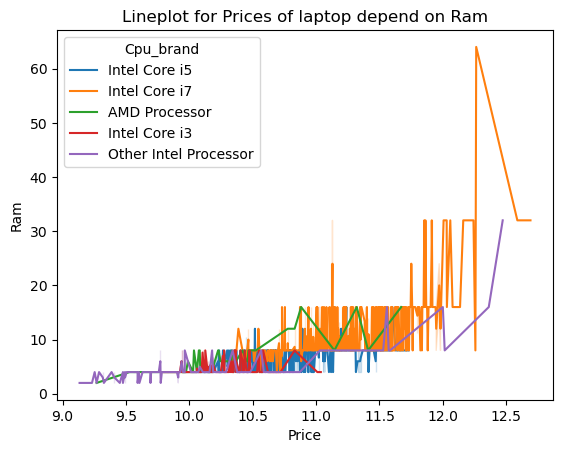

In [80]:
sns.lineplot(x='Price',y='Ram', hue='Cpu_brand', data=df)
plt.title('Lineplot for Prices of laptop depend on Ram')

C:\Users\Sourabh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


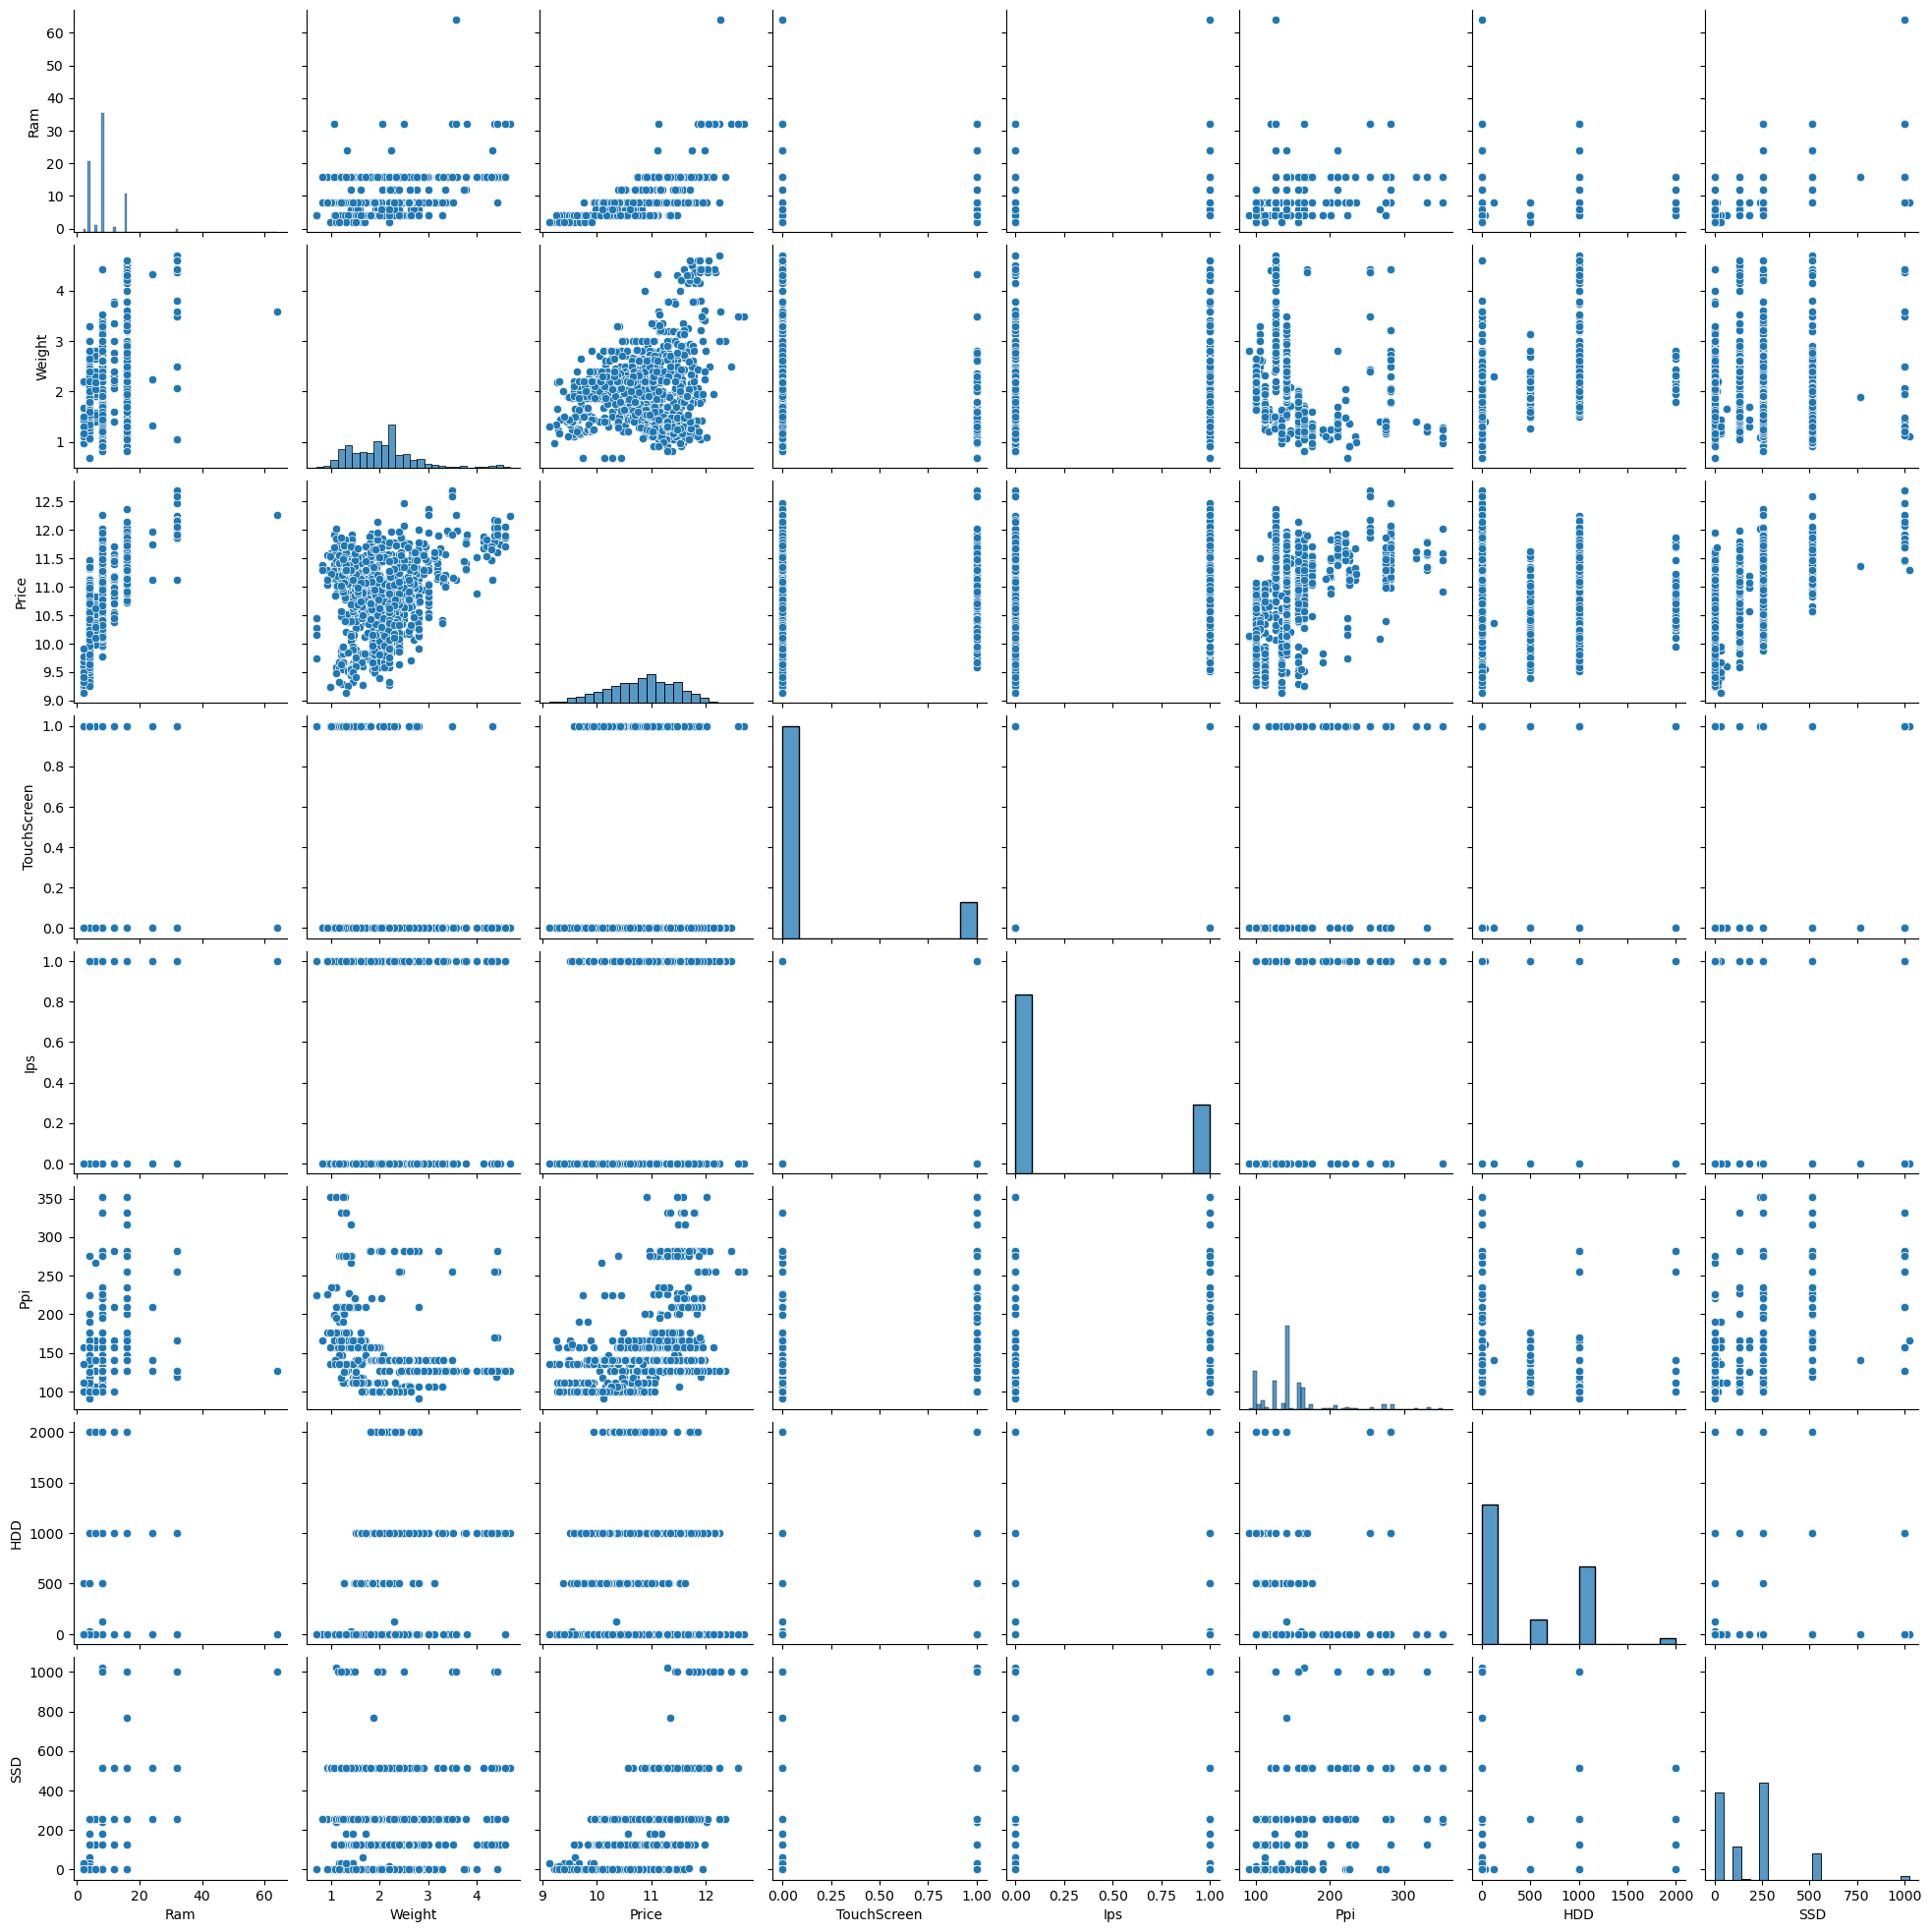

In [81]:
sns.pairplot(df)

In [84]:
df.dropna(inplace = True)

In [23]:
cat_cols = ['Company', 'TypeName', 'Cpu_brand']
encoder = OneHotEncoder(drop = 'first', sparse = False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[cat_cols]),columns = encoder.get_feature_names_out(cat_cols))

C:\Users\Sourabh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
stand_cols = ['Ram', 'Weight', 'SSD']
scaler = StandardScaler()
scaler_cols = pd.DataFrame(scaler.fit_transform(df[stand_cols]),columns = scaler.get_feature_names_out(stand_cols))

In [25]:
scaler_cols

,Ram,Weight,SSD
0,-0.087852,-1.003171,-0.312418
1,-0.087852,-1.048016,-0.998899
2,-0.087852,-0.270711,0.374062
3,1.481770,-0.315556,1.747024
4,-0.087852,-1.003171,0.374062
...,...,...,...
1268,-0.872663,0.237527,-0.998899
1269,-0.872663,-0.360400,-0.312418
1270,1.481770,-1.107809,1.747024
1271,-1.265069,-0.808845,-0.998899


In [26]:
encoded_cols

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,...,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
x = pd.concat([encoded_cols, scaler_cols], axis = 1)
y = df['Price']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R2 score :", r2)
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)

R2 score : 0.79141917092836
MAE : 0.22916915575661417
MSE : 0.08262379770775155
RMSE : 0.2874435556900721


In [33]:
ridge_model = Ridge()

In [34]:
param_grid = {'alpha': [0.1, 1, 10, 100]}

In [45]:
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [39]:
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

Best Alpha: 0.1


In [43]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.7924407774272302
